In [1]:
# @title Cell 1 - Environment setup (stable versions)

# Install PyTorch (CUDA 12.1 build) - works on Colab GPUs
!pip install torch==2.3.0 torchvision==0.18.0 torchaudio==2.3.0 --index-url https://download.pytorch.org/whl/cu121

# Other dependencies
!pip install opencv-python matplotlib tqdm

# Install HuggingFace and other utilities
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install git+https://github.com/IDEA-Research/GroundingDINO.git
!pip install huggingface_hub

# Make sure ffmpeg is installed
!apt-get update -qq
!apt-get install -y ffmpeg

# Clone repos (for models and scripts)
!git clone https://github.com/facebookresearch/segment-anything.git
!git clone https://github.com/IDEA-Research/GroundingDINO.git

print("✅ Environment ready. Next step: download model weights")


Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.9/780.9 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 108.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 103.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 122.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/19

In [2]:
# @title Cell 2 - Download model weights for GroundingDINO and SAM

import os

# Create directories
os.makedirs("weights", exist_ok=True)

# GroundingDINO weights
if not os.path.exists("weights/groundingdino_swint_ogc.pth"):
    !wget -O weights/groundingdino_swint_ogc.pth https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

# SAM weights (ViT-H, most accurate)
if not os.path.exists("weights/sam_vit_h_4b8939.pth"):
    !wget -O weights/sam_vit_h_4b8939.pth https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

print("✅ Model weights downloaded and stored in ./weights")


--2025-09-21 05:12:15--  https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/611591640/f221e500-c2fc-4fd3-b84e-8ad92a6923f3?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-09-21T05%3A59%3A16Z&rscd=attachment%3B+filename%3Dgroundingdino_swint_ogc.pth&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-09-21T04%3A58%3A34Z&ske=2025-09-21T05%3A59%3A16Z&sks=b&skv=2018-11-09&sig=62KW7sxf4NmYKGvnZxGKrPUZD5fwCcLMlqwvt4Rcj9w%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1ODQzMTgzNSwibmJmIjoxNzU4NDMxNTM1LCJwYXRo

In [3]:
# @title Cell 3 - Upload video and inspect properties

from google.colab import files
import subprocess

# Upload video
uploaded = files.upload()

# Get uploaded filename
video_path = list(uploaded.keys())[0]
print(f"✅ Uploaded video: {video_path}")

# Inspect video with ffmpeg
print("\n--- Video Properties ---")
subprocess.run(["ffmpeg", "-i", video_path, "-hide_banner"])


Saving shanin12.mp4 to shanin12.mp4
✅ Uploaded video: shanin12.mp4

--- Video Properties ---


CompletedProcess(args=['ffmpeg', '-i', 'shanin12.mp4', '-hide_banner'], returncode=1)

In [4]:
# @title Cell 4 - Extract frames and audio from the input video

import os
import subprocess

# Create folders
os.makedirs("frames", exist_ok=True)

# Extract frames (as PNG to avoid compression artifacts)
subprocess.run([
    "ffmpeg", "-i", video_path,
    "-q:v", "2",  # high quality
    "frames/frame_%06d.png"
])

print("✅ Frames extracted to ./frames")

# Extract audio (if exists)
if not os.path.exists("audio.aac"):
    subprocess.run([
        "ffmpeg", "-i", video_path,
        "-vn", "-acodec", "copy", "audio.aac"
    ])
    print("✅ Audio extracted to audio.aac")
else:
    print("⚠️ Audio already exists, skipped extraction")


✅ Frames extracted to ./frames
✅ Audio extracted to audio.aac


In [24]:
# @title Cell 5 - Run GroundingDINO on frames to produce detections

import torch
import json
import os
from tqdm import tqdm
import cv2

# === Prompt input ===
prompt = 'shirts, pants'  #@param {type: "string"}
box_threshold = 0.3  # confidence threshold for detections
text_threshold = 0.25

# Import GroundingDINO
import sys
sys.path.append("GroundingDINO")

from groundingdino.util.inference import load_model, load_image, predict

# Load model
model_path = "weights/groundingdino_swint_ogc.pth"
config_path = "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py"
dino_model = load_model(config_path, model_path)

# Prepare output folder
os.makedirs("detections", exist_ok=True)

# Process all frames
frame_files = sorted([f for f in os.listdir("frames") if f.endswith(".png")])
print(f"Processing {len(frame_files)} frames with prompt: {prompt}")

for frame_file in tqdm(frame_files):
    frame_path = os.path.join("frames", frame_file)
    image_source, image = load_image(frame_path)  # image_source = np.array, image = tensor

    # Run prediction
    boxes, logits, phrases = predict(
        model=dino_model,
        image=image,
        caption=prompt,
        box_threshold=box_threshold,
        text_threshold=text_threshold
    )

    h, w, _ = image_source.shape

    # Convert normalized [cx, cy, w, h] → absolute [x1, y1, x2, y2]
    abs_boxes = []
    for (cx, cy, bw, bh) in boxes.tolist():
        x1 = (cx - bw/2) * w
        y1 = (cy - bh/2) * h
        x2 = (cx + bw/2) * w
        y2 = (cy + bh/2) * h
        abs_boxes.append([x1, y1, x2, y2])

    # Save detection metadata
    det_path = os.path.join("detections", frame_file.replace(".png", ".json"))
    with open(det_path, "w") as f:
        json.dump({
            "boxes": abs_boxes,
            "phrases": phrases,
            "logits": logits.tolist()
        }, f)

print("✅ All detections saved in ./detections as absolute pixel coords")


final text_encoder_type: bert-base-uncased
Processing 180 frames with prompt: shirts, pants


100%|██████████| 180/180 [01:12<00:00,  2.47it/s]

✅ All detections saved in ./detections as absolute pixel coords


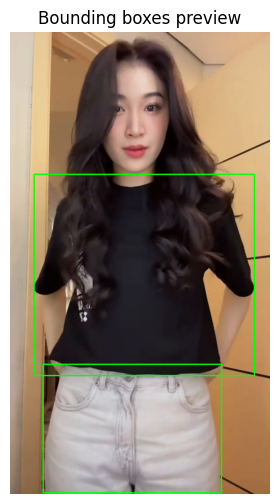

Boxes (pixel coords):
 [[  73  736  468 1021]
 [  53  315  541  761]]
Phrases: ['pants', 'shirts']


In [30]:
# @title Cell 5.5 – Preview bounding boxes from detections

import cv2
import json
import matplotlib.pyplot as plt
import os
import numpy as np

# Pick one frame for preview
frame_file = "frame_000031.png"
det_file = "frame_000031.json"

frame_path = os.path.join("frames", frame_file)
det_path = os.path.join("detections", det_file)

# Load image
image = cv2.imread(frame_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load detections
with open(det_path, "r") as f:
    det = json.load(f)
boxes = np.array(det["boxes"])

# Convert normalized → absolute coords
h, w = image.shape[:2]
if boxes.size > 0 and boxes.max() <= 1.0:
    boxes[:, [0, 2]] *= w
    boxes[:, [1, 3]] *= h

# Draw boxes
image_copy = image_rgb.copy()
for box in boxes.astype(int):
    x1, y1, x2, y2 = box
    cv2.rectangle(image_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Show image with boxes
plt.figure(figsize=(8, 6))
plt.imshow(image_copy)
plt.axis("off")
plt.title("Bounding boxes preview")
plt.show()

print("Boxes (pixel coords):\n", boxes.astype(int))
print("Phrases:", det.get("phrases", []))


In [26]:
# @title Cell 6 - Run SAM on detections to generate masks

import torch
import numpy as np
import json
from tqdm import tqdm
import cv2
import os

# Import SAM
import sys
sys.path.append("segment-anything")
from segment_anything import sam_model_registry, SamPredictor

# Load SAM model
sam_checkpoint = "weights/sam_vit_h_4b8939.pth"
sam = sam_model_registry["vit_h"](checkpoint=sam_checkpoint)
sam.to("cuda")
predictor = SamPredictor(sam)

# Prepare mask folder
os.makedirs("masks", exist_ok=True)

# Process frames
frame_files = sorted([f for f in os.listdir("frames") if f.endswith(".png")])

saved_count = 0
skipped_count = 0

for frame_file in tqdm(frame_files):
    frame_path = os.path.join("frames", frame_file)
    det_path = os.path.join("detections", frame_file.replace(".png", ".json"))

    # Skip if no detections
    if not os.path.exists(det_path):
        skipped_count += 1
        continue

    # Load frame
    image = cv2.imread(frame_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    predictor.set_image(image_rgb)

    # Load detections
    with open(det_path, "r") as f:
        det = json.load(f)
    boxes = np.array(det["boxes"])

    if len(boxes) == 0:
        # Save empty mask if nothing detected
        mask = np.zeros(image.shape[:2], dtype=np.uint8)
    else:
        # Predict mask for each box
        transformed_boxes = predictor.transform.apply_boxes_torch(
            torch.tensor(boxes, device="cuda"),
            image.shape[:2]
        )
        masks, _, _ = predictor.predict_torch(
            point_coords=None,
            point_labels=None,
            boxes=transformed_boxes,
            multimask_output=False
        )

        # Merge all masks into one binary mask
        mask = masks.sum(dim=0).cpu().numpy()
        mask = (mask > 0).astype(np.uint8) * 255

    # Fix shape (remove leading channel if exists)
    mask = np.squeeze(mask)

    # Save mask with debug check
    mask_path = os.path.join("masks", frame_file)
    success = cv2.imwrite(mask_path, mask)
    if not success:
        print("❌ Failed to save:", mask_path, "| shape:", mask.shape, "| dtype:", mask.dtype, "| unique:", np.unique(mask))
    else:
        saved_count += 1

print(f"✅ All masks processed. Saved: {saved_count}, Skipped: {skipped_count}, Total frames: {len(frame_files)}")


100%|██████████| 180/180 [06:16<00:00,  2.09s/it]

✅ All masks processed. Saved: 180, Skipped: 0, Total frames: 180


In [34]:
# @title Cell 7 - Generate masked frames for Output A (B&W) and Output B (Grey overlay)

import os
import cv2
import numpy as np
from tqdm import tqdm

# Prepare output folders
os.makedirs("output_bw", exist_ok=True)
os.makedirs("output_grey", exist_ok=True)

frame_files = sorted([f for f in os.listdir("frames") if f.endswith(".png")])

for frame_file in tqdm(frame_files):
    frame_path = os.path.join("frames", frame_file)
    mask_path = os.path.join("masks", frame_file)

    # Load images
    frame = cv2.imread(frame_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    if mask is None:
        # if no mask found, create empty mask
        mask = np.zeros(frame.shape[:2], dtype=np.uint8)

    # --- Expand mask (without blur for BW output) ---
    iterations = 20   # expand ~20px
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    expanded = cv2.dilate(mask, kernel, iterations=iterations)

    # --- Output A: black & white mask (expanded, not blurred) ---
    bw = cv2.merge([expanded, expanded, expanded])  # 3-channel B&W
    cv2.imwrite(os.path.join("output_bw", frame_file), bw)

    # --- Smooth expanded mask for blending in grey overlay ---
    smooth = cv2.GaussianBlur(expanded, (41, 41), 0)
    smooth = cv2.normalize(smooth, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # --- Output B: grey overlay ---
    grey = frame.copy()
    grey_color = (126, 126, 126)  # mid-grey

    # Create alpha mask for blending
    alpha = smooth.astype(float) / 255.0
    for c in range(3):
        grey[:, :, c] = (1 - alpha) * grey[:, :, c] + alpha * grey_color[c]

    # Apply blur only to output_grey
    grey = cv2.GaussianBlur(grey, (9, 9), 0)

    cv2.imwrite(os.path.join("output_grey", frame_file), grey)

print("✅ Output frames saved in ./output_bw (expanded) and ./output_grey (expanded + blurred)")


100%|██████████| 180/180 [00:12<00:00, 14.77it/s]

✅ Output frames saved in ./output_bw (expanded) and ./output_grey (expanded + blurred)


In [35]:
# @title Cell 8 - Re-encode frames into videos and reattach audio

import subprocess

# Get fps from original video
import re

def get_fps(video_path):
    result = subprocess.run(
        ["ffmpeg", "-i", video_path],
        stderr=subprocess.PIPE,
        text=True
    )
    match = re.search(r'(\d+(?:\.\d+)?) fps', result.stderr)
    return match.group(1) if match else "30"

fps = get_fps(video_path)
print(f"Detected FPS: {fps}")

# Rebuild Output A (B&W)
subprocess.run([
    "ffmpeg", "-y", "-framerate", fps, "-i", "output_bw/frame_%06d.png",
    "-i", "audio.aac", "-c:v", "libx264", "-pix_fmt", "yuv420p",
    "-c:a", "aac", "-shortest", "output_bw.mp4"
])

# Rebuild Output B (Grey overlay)
subprocess.run([
    "ffmpeg", "-y", "-framerate", fps, "-i", "output_grey/frame_%06d.png",
    "-i", "audio.aac", "-c:v", "libx264", "-pix_fmt", "yuv420p",
    "-c:a", "aac", "-shortest", "output_grey.mp4"
])

print("✅ Videos created: output_bw.mp4 and output_grey.mp4")


Detected FPS: 12
✅ Videos created: output_bw.mp4 and output_grey.mp4


In [36]:
# @title Cell 9 Download

from google.colab import files
files.download("/content/output_bw.mp4")

from google.colab import files
files.download("/content/output_grey.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>